Problem Statement:-
you will develop a model to predict how many yards a team will gain on given rushing plays as they happen. You'll be provided game, play, and player-level data, including the position and speed of players as provided in the NFL’s Next Gen Stats data. And the best part - you can see how your model performs from your living room, as the leaderboard will be updated week after week on the current season’s game data as it plays out.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('max_columns',100)


In [2]:
nfl_data=pd.read_csv('train_nfl.csv',low_memory=False)

In [3]:
nfl_data

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682149,2019112500,20191125003789,home,69.58,31.33,4.19,1.33,0.43,92.32,20.94,2556593,Cory Littleton,58,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-3,228,11/18/1993,Washington,ILB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682150,2019112500,20191125003789,home,72.16,25.09,1.01,1.40,0.08,65.83,76.48,2558199,Tanzel Smart,92,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-1,295,11/06/1994,Tulane,DT,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682151,2019112500,20191125003789,home,72.23,31.95,1.75,0.68,0.17,93.99,90.26,2558830,Samson Ebukam,50,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-3,245,05/09/1995,Eastern Washington,OLB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682152,2019112500,20191125003789,home,72.08,26.74,0.70,1.59,0.07,61.47,48.34,2562391,Greg Gaines,91,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-1,312,05/06/1996,Washington,DT,LA,BAL,12,Los Angeles Memoria

In [4]:
nfl_data.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [5]:
nfl_data.shape

(682154, 49)

In [6]:
nfl_data.tail()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
682149,2019112500,20191125003789,home,69.58,31.33,4.19,1.33,0.43,92.32,20.94,2556593,Cory Littleton,58,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-3,228,11/18/1993,Washington,ILB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682150,2019112500,20191125003789,home,72.16,25.09,1.01,1.40,0.08,65.83,76.48,2558199,Tanzel Smart,92,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-1,295,11/06/1994,Tulane,DT,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682151,2019112500,20191125003789,home,72.23,31.95,1.75,0.68,0.17,93.99,90.26,2558830,Samson Ebukam,50,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-3,245,05/09/1995,Eastern Washington,OLB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682152,2019112500,20191125003789,home,72.08,26.74,0.70,1.59,0.07,61.47,48.34,2562391,Greg Gaines,91,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-1,312,05/06/1996,Washington,DT,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW
682153,2019112500,20191125003789,home,68.11,24.67,4.71,1.30,0.47,48.28,27.89,2562707,Taylor Rapp,24,2019,38,4,04:11:00,BLT,2,9,BLT,6,45,2562407,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",left,2019-11-26T03:59:06.000Z,2019-11-26T03:59:05.000Z,4,6-0,208,12/22/1997,Washington,DB,LA,BAL,12,Los Angeles Memorial Coliseum,"Los Angeles, CA",Outdoor,Grass,Clear,62.0,64.0,5,WSW


In [7]:
nfl_data.isnull().sum()

GameId                         0
PlayId                         0
Team                           0
X                              0
Y                              0
S                              0
A                              0
Dis                            0
Orientation                   23
Dir                           28
NflId                          0
DisplayName                    0
JerseyNumber                   0
Season                         0
YardLine                       0
Quarter                        0
GameClock                      0
PossessionTeam                 0
Down                           0
Distance                       0
FieldPosition               8602
HomeScoreBeforePlay            0
VisitorScoreBeforePlay         0
NflIdRusher                    0
OffenseFormation              88
OffensePersonnel               0
DefendersInTheBox             22
DefensePersonnel               0
PlayDirection                  0
TimeHandoff                    0
TimeSnap  

Yards The target we are trying to predict

It's always smart to take a close look at the variable we are trying to predict.

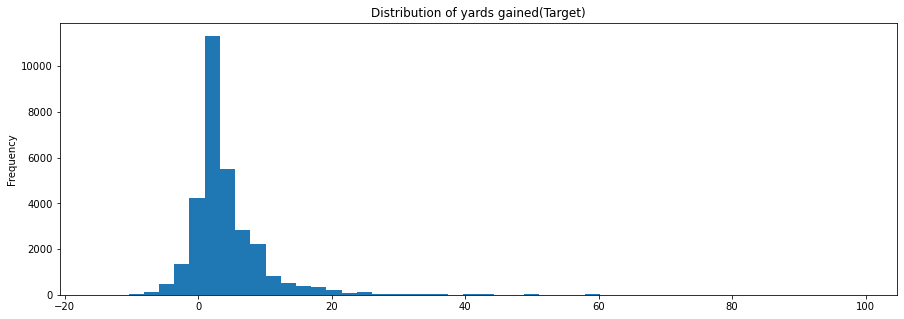

In [8]:
nfl_data.groupby('PlayId').first()['Yards'] \
        .plot(kind='hist', figsize=(15,5), bins=50, title='Distribution of yards gained(Target)')
plt.show()

Yards Gained on Down

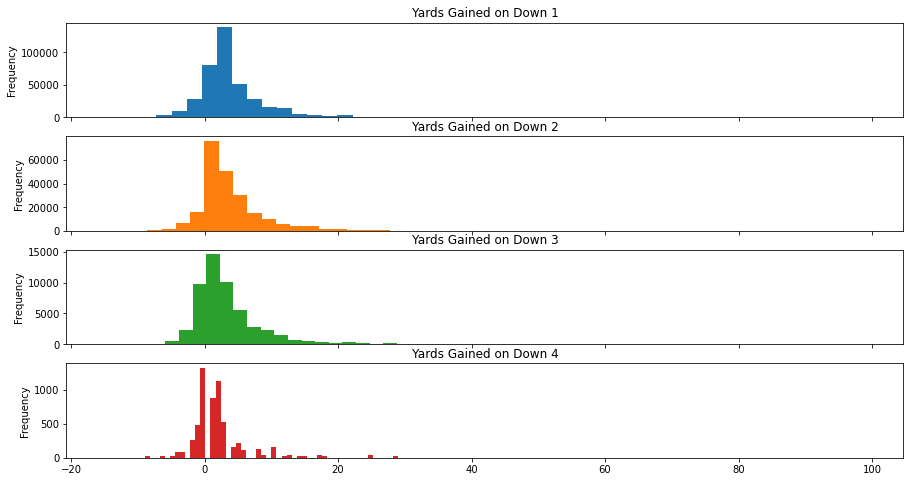

In [9]:
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
fig,axes=plt.subplots(4 , 1 , figsize=(15,8), sharex=True)
n=0
for i,d in nfl_data.groupby('Down'):
    d['Yards'].plot(kind='hist',bins=50,color=color_pal[n],ax=axes[n],title=f'Yards Gained on Down {i}')
    n+=1

Yards gained by Distance-to-Gain


We can see that there appears to be a increase in the average yards gained as the distance to gain increases. We also can see that as the distances increase the distribution of Yards moves from a normal distribution to bimodal. This could be because of sparsity of data for the extremely large distance-to-gain values.

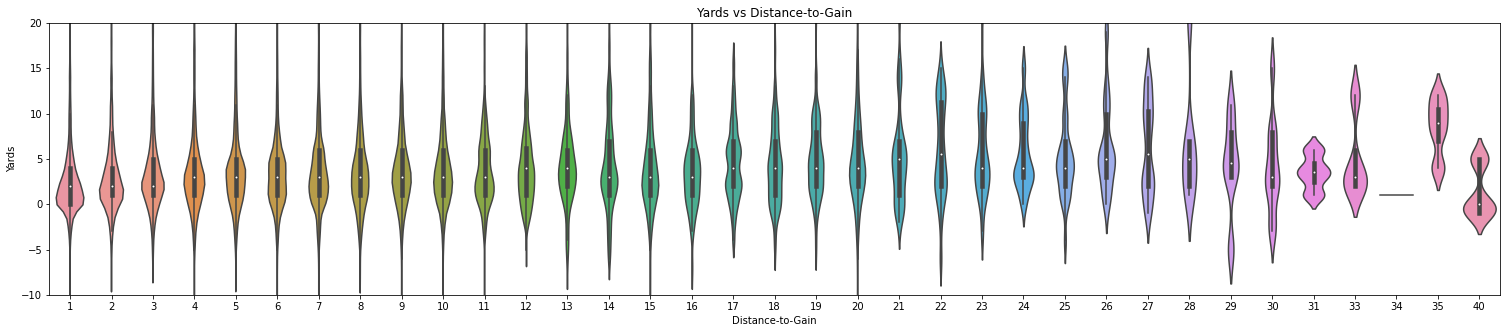

In [10]:
fig,ax=plt.subplots(figsize=(26,5))
sns.violinplot(x='Distance-to-Gain',y='Yards',data=nfl_data.rename(columns={'Distance':'Distance-to-Gain'}),ax=ax)
plt.ylim(-10,20)
plt.title('Yards vs Distance-to-Gain')
plt.show()

GameId and PlayID - a unique game identifier

We can see the number of plays provided for a typical gameID.

688 Games

31007 Plays

In [11]:
print('unique game data provided: {}'.format(nfl_data['GameId'].nunique()))
print('unique play data provided: {}'.format(nfl_data['PlayId'].nunique()))

unique game data provided: 688
unique play data provided: 31007


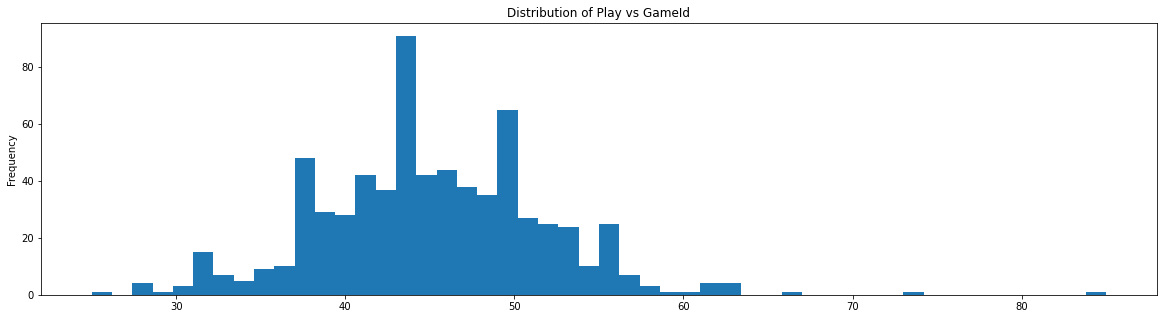

In [12]:
nfl_data.groupby('GameId')['PlayId'] \
    .nunique() \
    .plot(kind='hist', figsize=(20,5),title='Distribution of Play vs GameId',bins=50)
plt.show()

Down and Distance

We can see the majority of running plays occur on first down. This is not unexpected as running plays are much more common in earlier downs.

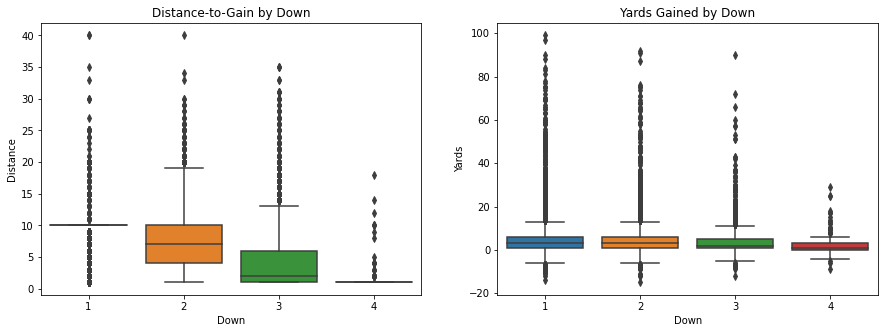

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=nfl_data.groupby('PlayId').first()[['Distance','Down']],
            x='Down', y='Distance', ax=ax1)
ax1.set_title('Distance-to-Gain by Down')
sns.boxplot(data=nfl_data.groupby('PlayId').first()[['Yards','Down']],
            x='Down', y='Yards', ax=ax2)
ax2.set_title('Yards Gained by Down')
plt.show()

Distance to Gain is commonly 10 Yards

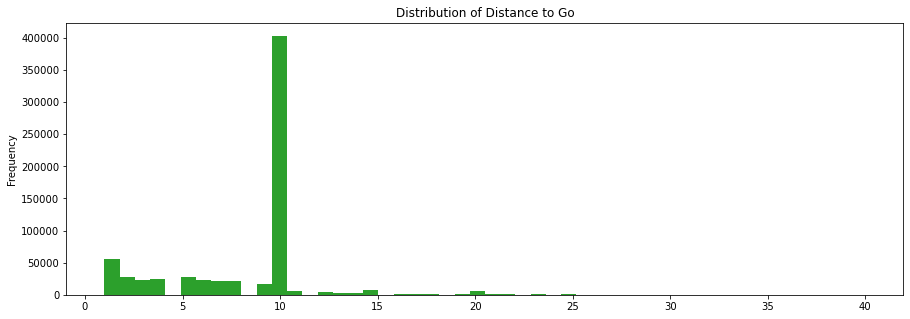

In [14]:
nfl_data['Distance'].plot(kind='hist',title='Distribution of Distance to Go',bins=50,color=color_pal[2],figsize=(15,5))
plt.show()

Speed, Acceleration, and Distance

We are provided with the speed, acceleration, and distance each player has traveled since the previous point.

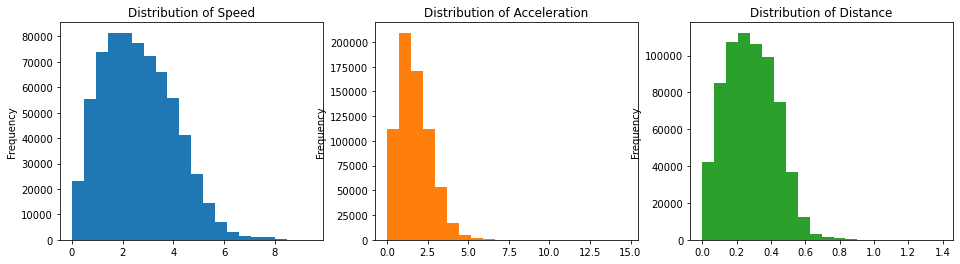

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
nfl_data['S'].plot(kind='hist', ax=ax1,
                title='Distribution of Speed',
                bins=20,
                color=color_pal[0])
nfl_data['A'].plot(kind='hist',
                ax=ax2,
                title='Distribution of Acceleration',
                bins=20,
                color=color_pal[1])
nfl_data['Dis'].plot(kind='hist',
                  ax=ax3,
                  title='Distribution of Distance',
                  bins=20,
                  color=color_pal[2])
plt.show()

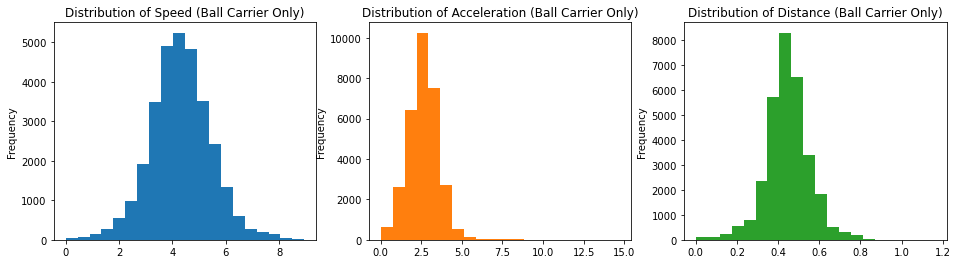

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
nfl_data.query("NflIdRusher == NflId")['S'] \
    .plot(kind='hist',
          ax=ax1,
          title='Distribution of Speed (Ball Carrier Only)',
          bins=20,
          color=color_pal[0])
nfl_data.query("NflIdRusher == NflId")['A'] \
    .plot(kind='hist',
          ax=ax2,
          title='Distribution of Acceleration (Ball Carrier Only)',
          bins=20,
          color=color_pal[1])
nfl_data.query("NflIdRusher == NflId")['Dis'] \
    .plot(kind='hist',
          ax=ax3,
          title='Distribution of Distance (Ball Carrier Only)',
          bins=20,
          color=color_pal[2])
plt.show()

Does Speed, Acceleration, and Distance of the runningback have a relationship with yards gained?

Lets look and see if the speed of the runningback correlates with the yardage gained. The color shows the different defensive personnels in each run.

It's not immediately clear if these features have a meaningful relationship with the yards gained

In [17]:
print(nfl_data['DefensePersonnel'].unique())

['2 DL, 3 LB, 6 DB' '4 DL, 4 LB, 3 DB' '3 DL, 2 LB, 6 DB'
 '3 DL, 4 LB, 4 DB' '3 DL, 3 LB, 5 DB' '4 DL, 3 LB, 4 DB'
 '4 DL, 1 LB, 6 DB' '4 DL, 2 LB, 5 DB' '5 DL, 2 LB, 4 DB'
 '2 DL, 4 LB, 5 DB' '2 DL, 5 LB, 4 DB' '5 DL, 4 LB, 2 DB'
 '1 DL, 5 LB, 5 DB' '5 DL, 3 LB, 3 DB' '6 DL, 2 LB, 3 DB'
 '3 DL, 5 LB, 3 DB' '6 DL, 3 LB, 2 DB' '1 DL, 3 LB, 7 DB'
 '2 DL, 2 LB, 7 DB' '4 DL, 5 LB, 2 DB' '1 DL, 4 LB, 6 DB'
 '4 DL, 5 LB, 1 DB, 1 OL' '6 DL, 1 LB, 4 DB' '2 DL, 4 LB, 4 DB, 1 OL'
 '6 DL, 4 LB, 1 DB' '5 DL, 1 LB, 5 DB' '4 DL, 6 LB, 1 DB'
 '0 DL, 5 LB, 6 DB' '5 DL, 4 LB, 1 DB, 1 OL' '3 DL, 1 LB, 7 DB'
 '4 DL, 0 LB, 7 DB' '3 DL, 4 LB, 3 DB, 1 OL' '5 DL, 5 LB, 1 DB'
 '5 DL, 3 LB, 2 DB, 1 OL' '0 DL, 6 LB, 5 DB' '1 DL, 2 LB, 8 DB'
 '0 DL, 4 LB, 7 DB' '7 DL, 2 LB, 2 DB' '0 DL, 4 LB, 6 DB, 1 RB'
 '1 DL, 4 LB, 5 DB, 1 RB' '2 DL, 4 LB, 4 DB, 1 RB'
 '2 DL, 3 LB, 5 DB, 1 RB' '1 DL, 3 LB, 6 DB, 1 RB'
 '3 DL, 4 LB, 3 DB, 1 RB' '4 DL, 3 LB, 5 DB']


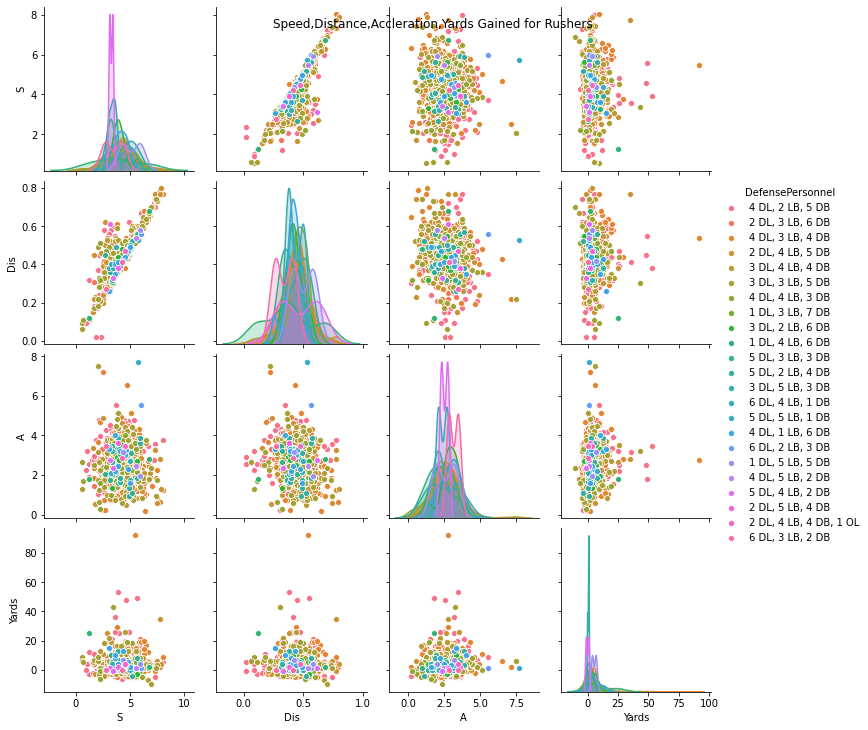

In [18]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(nfl_data.query("NflIdRusher == NflId").sample(1000)[['S','Dis','A','Yards','DefensePersonnel']],hue='DefensePersonnel')
plt.suptitle('Speed,Distance,Accleration,Yards Gained for Rushers')
plt.show()

OffensePersonnel / DefensePersonnel

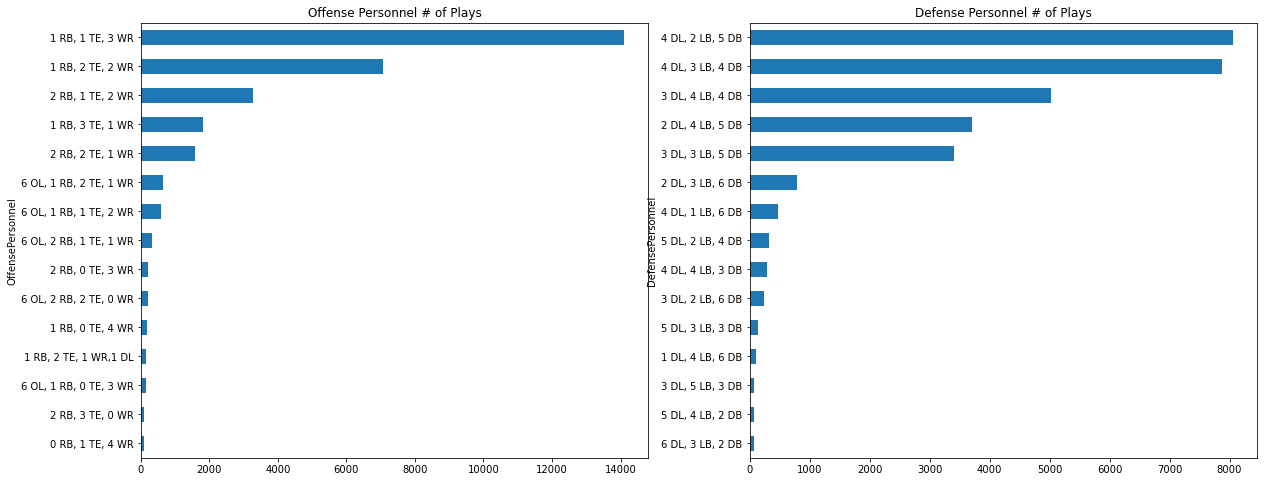

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
nfl_data.groupby('PlayId') \
    .first() \
    .groupby('OffensePersonnel') \
    .count()['GameId'] \
    .sort_values(ascending=False) \
    .head(15) \
    .sort_values() \
    .plot(kind='barh',
         title='Offense Personnel # of Plays',
         ax=ax[0])
nfl_data.groupby('PlayId') \
    .first() \
    .groupby('DefensePersonnel') \
    .count()['GameId'] \
    .sort_values(ascending=False) \
    .head(15) \
    .sort_values() \
    .plot(kind='barh',
         title='Defense Personnel # of Plays',
         ax=ax[1])
plt.show()

In [20]:
print(nfl_data['OffensePersonnel'].unique())

['1 RB, 1 TE, 3 WR' '6 OL, 2 RB, 2 TE, 0 WR' '1 RB, 3 TE, 1 WR'
 '1 RB, 2 TE, 2 WR' '6 OL, 1 RB, 2 TE, 1 WR' '2 RB, 1 TE, 2 WR'
 '2 RB, 2 TE, 1 WR' '0 RB, 3 TE, 2 WR' '0 RB, 1 TE, 4 WR'
 '6 OL, 1 RB, 0 TE, 3 WR' '6 OL, 1 RB, 1 TE, 2 WR' '1 RB, 2 TE, 1 WR,1 DL'
 '1 RB, 3 TE, 0 WR,1 DL' '1 RB, 0 TE, 4 WR' '1 RB, 1 TE, 2 WR,1 DL'
 '6 OL, 2 RB, 0 TE, 2 WR' '2 RB, 0 TE, 3 WR' '6 OL, 2 RB, 1 TE, 1 WR'
 '7 OL, 1 RB, 0 TE, 2 WR' '7 OL, 2 RB, 0 TE, 1 WR'
 '7 OL, 1 RB, 2 TE, 0 WR' '2 RB, 3 TE, 0 WR' '3 RB, 1 TE, 1 WR'
 '6 OL, 1 RB, 3 TE, 0 WR' '6 OL, 1 RB, 2 TE, 0 WR,1 DL' '2 RB, 3 TE, 1 WR'
 '6 OL, 1 RB, 1 TE, 1 WR,1 DL' '1 RB, 4 TE, 0 WR' '1 RB, 2 TE, 1 WR,1 LB'
 '1 RB, 3 TE, 0 WR,1 LB' '7 OL, 2 RB, 1 TE, 0 WR' '0 RB, 2 TE, 3 WR'
 '1 RB, 0 TE, 3 WR,1 DB' '6 OL, 1 RB, 2 TE, 0 WR,1 LB'
 '1 RB, 1 TE, 2 WR,1 DB' '0 RB, 0 TE, 5 WR' '1 RB, 2 TE, 3 WR'
 '1 RB, 1 TE, 2 WR,1 LB' '1 RB, 3 TE, 0 WR,1 DB'
 '6 OL, 2 RB, 1 TE, 0 WR,1 DL' '2 QB, 1 RB, 1 TE, 2 WR'
 '6 OL, 0 RB, 2 TE, 2 WR' '3 RB, 0 TE, 2 WR' 

Defensive Personnel's' impact on yard gained

We can see that there are about 5 common defensive packages that are used. How does the way the defense is aligned correlate with the offensive production (yards gained)?

What stands out at first glance is that the 4DL - 4LB - 3DB Defense shows a different distribution in yards gained.